In [1]:
import numpy as np #may not need it, but its good to have it :)
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set() #overrides the styles and graphics of all matplotlib graphs

In [2]:
raw_data = pd.read_csv("1.03. Dummies.csv")

In [3]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


#### Attendance reflects if the student attended more than 75%  of the lectures

In [6]:
#Map the 'yes' and 'no' values with 1s and 0s respectively.
#Dummy -> Immitation of categories with numbers

In [7]:
data = raw_data.copy()

In [8]:
#Creating dummy variable
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [9]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [10]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


#### Regression Begins!

In [11]:
#defining the dependent (y) and independent variable (x1)
y = data['GPA']
x1 = data[['SAT', 'Attendance']] #dataframe with both series

In [12]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit() #result contain the i=ouput of OLS(Ordinary Least Squares)
#fit() to obtain fit of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 16 May 2020   Prob (F-statistic):           2.19e-15
Time:                        14:13:57   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R squared value is improved with third variable - attendance!

Earlier: GPA = 0.275 + (0.0017 * SAT)

The choice of 3rd variable affected the intercept too

Now: GPA = 0.6439 + (0.0014 * SAT) - (0.2226 * Attendance)

-

Actually the attendance(dummy) is either 0 or 1.

If the dummy is 0. The new equations becomes: GPA = 0.6439 + (0.0014 * SAT)

If the dummy is 1. The new equations becomes: GPA = 0.8665 + (0.0014 * SAT)

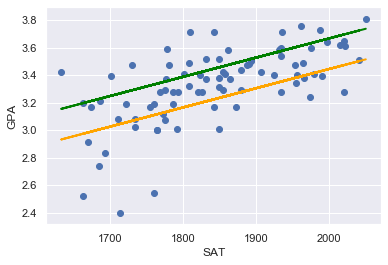

In [15]:
plt.scatter(data['SAT'], y)

yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']

fig = plt.plot(data['SAT'], yhat_no, lw=2, c='orange') #best fitting line
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='green')

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

#### Same slope but different intercept

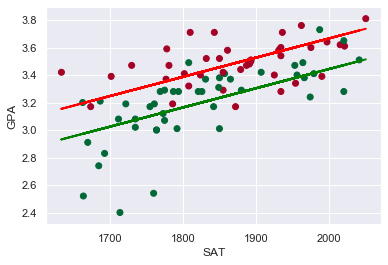

In [22]:
plt.scatter(data['SAT'], y, c=data['Attendance'], cmap='RdYlGn_r')

yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']

fig = plt.plot(data['SAT'], yhat_no, lw=2, c='Green') #best fitting line
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='Red')

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [23]:
#Original Intercept

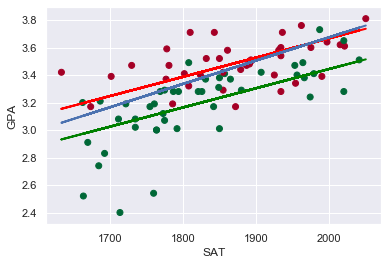

In [26]:
plt.scatter(data['SAT'], y, c=data['Attendance'], cmap='RdYlGn_r')

yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
yhat = 0.275 + 0.0017 * data['SAT'] 

fig = plt.plot(data['SAT'], yhat_no, lw=2, c='Green') #best fitting line
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='Red')
fig = plt.plot(data['SAT'], yhat, lw=2) #original intercept

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

#### There is one statmodels method which takes the dataframe organised the same way as X, and make predictions

In [27]:
#x is a dataframe
x 

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


#### Prediction begins!

In [31]:
#Bob, 1700 on SAT, has attendance below 75%
#Alice, 1670 on SAT, has attendance above 75%

In [30]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]})
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [34]:
new_data.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


###### Indices are lost if you use (e.g) NumPy transformations on the whole dataframe

In [39]:
prediction = result.predict(new_data)
prediction

0    3.023513
1    3.204163
dtype: float64

In [41]:
predictionsdf = pd.DataFrame({'GPA Predictions':prediction})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance,GPA Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


In [42]:
#Yes, the predictions make sense!